# コード7-1：偏微分方程式の数値計算の実装

『ウイルス感染の数理モデルとシミュレーション ーデータを定量的に理解するー』

偏微分方程式の数値計算の実装の例をまとめる。

## ライブラリ、パッケージ（モジュール）の読み込み

In [100]:
## 必要があればインストール
# !pip3 install matplotlib numpy

In [3]:
import matplotlib.pyplot as plt
import numpy as np

## 偏微分方程式の数値計算

式(7.2)

$$
\frac{d T(t)}{dt} = g T(t) \left( 1 - \frac{T(t) + I(t)}{K} \right) - \beta T(t) V_{I} (t) \\
\frac{d I(t)}{dt} = g I(t) \left( 1 - \frac{T(t) + I(t)}{K} \right) + \beta T(t) V_{I} (t) \\
\left( \frac{\partial}{\partial t} + \frac{\partial}{\partial a} \right) r(t, a) = k r(t, a) - (\mu + \rho) r(t, a) \\
\frac{d V_{I}(t)}{dt} = f \rho \int^{\infty}_{0}{r (t, a)}da - r V_{I}(t) - c V_{I} (t) \\
\frac{d V_{NI}(t)}{dt} = (1 - f) \rho \int^{\infty}_{0}{r (t, a)}da + r V_{I}(t) - c V_{I} (t)
$$

等価な式(7.5)を実験データに合わせて変形した式(7.6)

$$
\frac{d T(t)}{dt} = g T(t) \left( 1 - \frac{T(t) + I(t)}{K} \right) - \beta_{\theta} T(t) V_{\theta} (t) \\
\frac{d I(t)}{dt} = g I(t) \left( 1 - \frac{T(t) + I(t)}{K} \right) + \beta_{\theta} T(t) V_{\theta} (t) \\
\frac{d A(t)}{dt} = \beta_{\theta} T(t) V_{\theta} (t) - (k - \mu + \rho) A(t) \\
\frac{d V_{\theta}(t)}{dt} = f_{\theta} \rho A(t) - r V_{I}(t) - c V_{I} (t) \\
\frac{d V(t)}{dt} = \rho A(t) - c V (t) 
$$

$V(t) = V_I(t) + V_{NI}(t), V_\theta(t) = \alpha V_I(t), \beta_\theta = \frac{\beta}{\alpha}, f_\theta = \alpha f$であるので

式(7.2)を以下のように変形する。

$$
\frac{d T(t)}{dt} = g T(t) \left( 1 - \frac{T(t) + I(t)}{K} \right) - \beta_{\theta} T(t) V_{\theta} (t) \\
\frac{d I(t)}{dt} = g I(t) \left( 1 - \frac{T(t) + I(t)}{K} \right) + \beta_{\theta} T(t) V_{\theta} (t) \\
\left( \frac{\partial}{\partial t} + \frac{\partial}{\partial a} \right) r(t, a) = k r(t, a) - (\mu + \rho) r(t, a) \\
\frac{d V_{\theta}(t)}{dt} = f_{\theta} \rho \int^{\infty}_{0}{r (t, a)}da - r V_{\theta}(t) - c V_{\theta} (t) \\
\frac{d V(t)}{dt} = \rho \int^{\infty}_{0}{r (t, a)}da - c V_{I} (t)
$$

式(7.2)を変形した偏微分方程式と式(7.5)の常微分方程式をそれぞれ数値計算することで比較する。

実験開始後に感染した細胞の感染年齢aは 0 < a < tであり、0 < t < 4を考える。時刻0における感染細胞の感染年齢を-2として、r(t, a)をa方向に離散化した後、t方向にオイラー法によって計算する。

https://www.frontiersin.org/articles/10.3389/fmicb.2018.00601/full

The model equations were discretized in space, i.e., age, and integrated in time using the method of lines (MOL) approach (Sadiku and Obiozor, 2000; Shakeri and Dehghan, 2008) where the partial derivatives in age were approximated by finite-differences and the solution at the grid points was integrated along lines in time. We integrated the equations using the Matlab® ordinary differential equation Runge-Kutta solver ode45.

In [88]:
## パラメータと初期条件

dt = 0.0001

T_0 =16.9e+2
I_0 = 2.33e+2
r_0 = 2.94e+6
V_theta_0 = 29.1e-2
V_0 = 0.32e-7

g = 0.67
K_growth = 4.12e+4
beta_theta = 1.26e-4
k = 3.75
mu = 2.54
rho = 2.36e-2
f_theta = 1.19e-3
r = 1.52
c = 7.55e-2 + 1.18

Tmax = 4
age_initial = 2

num_a = int((Tmax + age_initial)//dt)

In [89]:
## 偏微分方程式の計算

time_list = []
T_list = []
I_list = []
r_list = []
V_theta_list = []
V_list = []

T_old = T_0
I_old = I_0
r_old = np.zeros(num_a)
r_old[0] = r_0
V_theta_old = V_theta_0
V_old = V_0

time_list.append(0)

T_list.append(T_old)
I_list.append(I_old)
r_list.append(r_old.copy())
V_theta_list.append(V_theta_old)
V_list.append(V_old)

for i in range(int(Tmax//dt)):
    
    r_new = r_old.copy()
    
    ## オイラー法による更新
    T_new = T_old + (g*T_old*(1 - (T_old + I_old)/K_growth) - beta_theta*T_old*V_theta_old)*dt
    I_new = I_old + (g*I_old*(1 - (T_old + I_old)/K_growth) + beta_theta*T_old*V_theta_old)*dt
    r_new = r_old + ((k - mu - rho)*r_old)*dt
    V_theta_new = V_theta_old + (f_theta*rho*np.sum(r_old) - r*V_theta_old - c*V_theta_old)*dt
    V_new = V_old + (rho*np.sum(r_old) - c*V_old)*dt
    
    ## 境界条件
    r_new[1:(num_a)] = r_new[0:(num_a-1)].copy()
    r_new[0] = 0.0
    
    r_new[int(2//dt)] = r_new[int(2//dt)] + (beta_theta*T_old*V_theta_old)*dt
    
    T_old = T_new
    I_old = I_new
    r_old = r_new.copy()
    V_theta_old = V_theta_new
    V_old = V_new
    
    time_list.append((i+1)*dt)
    
    T_list.append(T_old)
    I_list.append(I_old)
    r_list.append(r_old.copy())
    V_theta_list.append(V_theta_old)
    V_list.append(V_old)
    


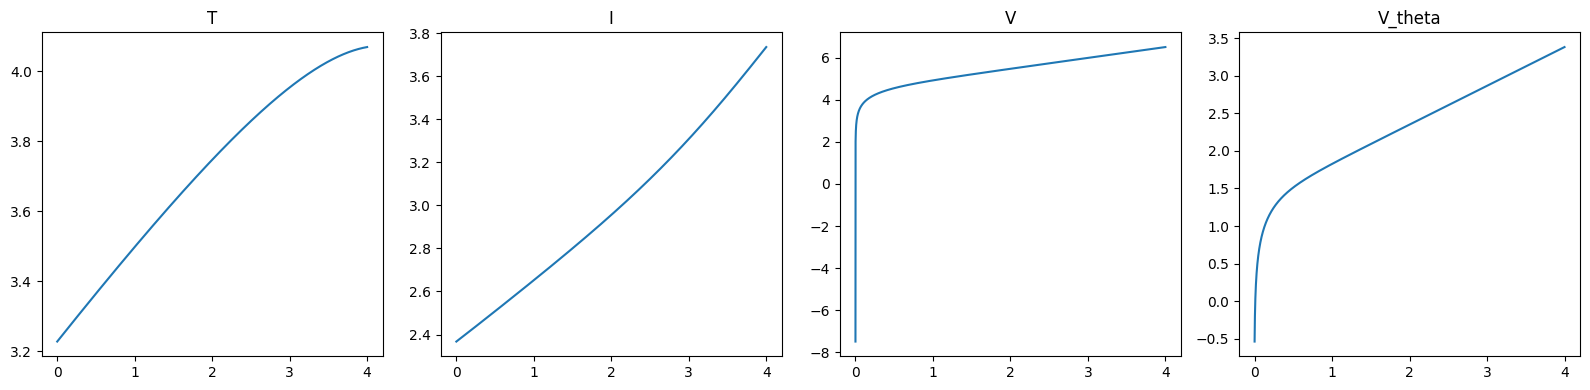

In [96]:
## 図7.2 実験B JFH-1
fig = plt.figure(figsize=(16,4))

for i in range(4):
    ax = fig.add_subplot(1, 4, i+1)
    ax.plot(np.array(time_list), np.log10(np.array([T_list, I_list, V_list, V_theta_list][i])))
    ax.set_title(["T", "I", "V", "V_theta"][i])

fig.tight_layout()
fig.show()

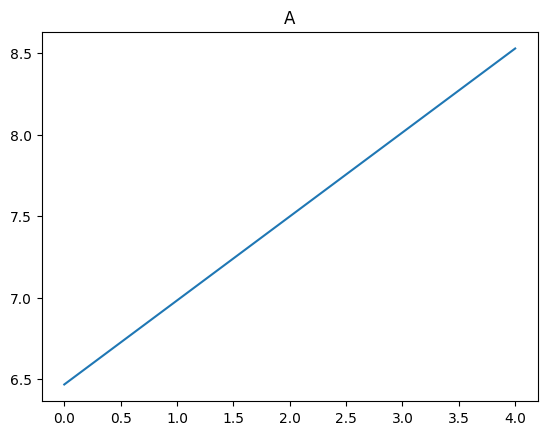

In [99]:
test = []

for i in range(int(Tmax//dt) + 1):
    test.append(np.sum(r_list[i]))
    
plt.plot(np.array(time_list), np.log10(np.array(test)))
plt.title("A")
plt.show()